**The Curse of Dimensionality**

Kita sudah begitu terbiasa hidup dalam tiga dimensi sehingga intuisi kita gagal ketika mencoba membayangkan ruang berdimensi tinggi. Bahkan sebuah hiperkubus 4D yang sederhana pun sangat sulit untuk dibayangkan dalam pikiran kita (lihat Gambar 8-1), apalagi sebuah elipsoid berdimensi 200 yang melengkung dalam ruang berdimensi 1.000.



 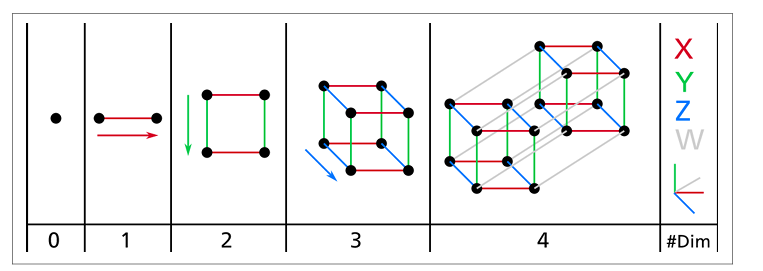

 Gambar 8-1. Titik, ruas garis, persegi, kubus, dan tesseract (hiperkubus 0D hingga 4D)

**Main Approaches for Dimensionality Reduction**

Projection

Dalam sebagian besar masalah dunia nyata, contoh pelatihan tidak tersebar secara merata di semua dimensi. Banyak fitur yang hampir konstan, sementara yang lain sangat berkorelasi (seperti yang dibahas sebelumnya untuk MNIST). Akibatnya, semua contoh pelatihan terletak di dalam (atau dekat) subruang berdimensi yang jauh lebih rendah dari ruang berdimensi tinggi. Ini terdengar sangat abstrak, jadi mari kita lihat sebuah contoh. Pada Gambar 8-2 Anda dapat melihat kumpulan data 3D yang direpresentasikan oleh lingkaran.

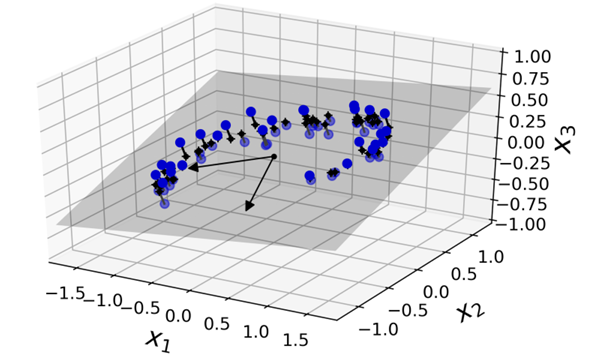


Gambar 8-2. Kumpulan data 3D yang terletak dekat dengan subruang 2D

Perhatikan bahwa semua contoh pelatihan terletak dekat dengan bidang: ini adalah subruang berdimensi rendah (2D) dari ruang berdimensi tinggi (3D). Jika kita memproyeksikan setiap contoh pelatihan secara tegak lurus ke subruang ini (seperti yang direpresentasikan oleh garis pendek yang menghubungkan contoh ke bidang), kita mendapatkan kumpulan data 2D baru yang ditunjukkan pada Gambar 8-3. Ta-da! Kita baru saja mengurangi dimensionalitas kumpulan data dari 3D ke 2D. Perhatikan bahwa sumbu berkorespondensi dengan fitur baru z1 dan z2 (koordinat proyeksi pada bidang).

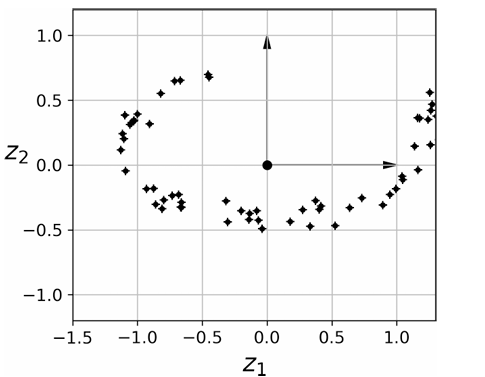

Gambar 8-3. Dataset 2D baru setelah proyeksi

Namun, proyeksi tidak selalu merupakan pendekatan terbaik untuk pengurangan dimensionalitas. Dalam banyak kasus, subruang dapat berputar dan berputar, seperti pada kumpulan data mainan gulung Swiss yang terkenal yang direpresentasikan pada Gambar 8-4.

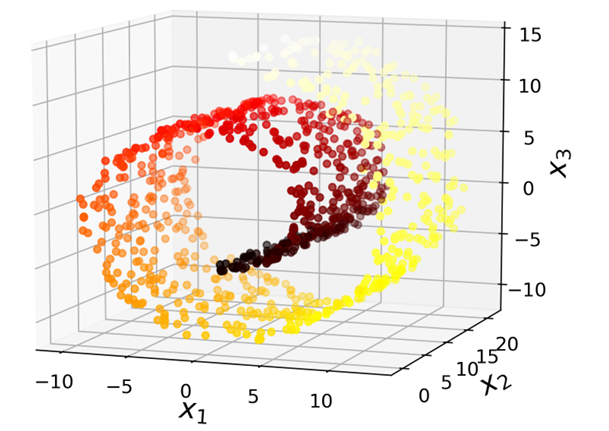

Gambar 8-4. Kumpulan data gulungan Swiss

Memproyeksikan ke bidang datar (misalnya, dengan menjatuhkan x3) akan menyatukan lapisan-lapisan gulungan Swiss yang berbeda, seperti yang ditunjukkan di sisi kiri Gambar 8-5. Yang benar-benar Anda inginkan adalah membuka gulungan Swiss untuk memperoleh kumpulan data 2D di sisi kanan Gambar 8-5.

 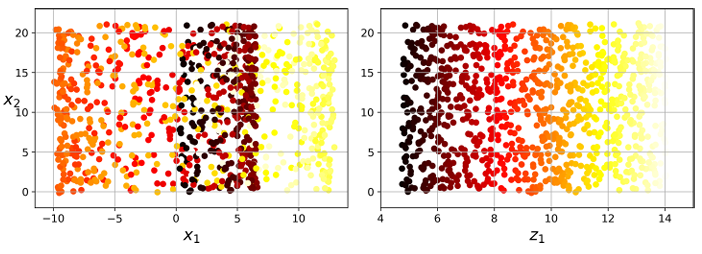

 Gambar 8-5. Meremas dengan memproyeksikan ke bidang datar (kiri) versus membuka gulungan Swiss (kanan)

**Principal Components**

In [ ]:
import numpy as np

In [ ]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 2))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2

In [ ]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

**Using Scikit-Learn**

Kelas PCA Scikit-Learn menggunakan dekomposisi SVD untuk mengimplementasikan PCA, seperti yang telah kita lakukan sebelumnya dalam bab ini. Kode berikut menerapkan PCA untuk mengurangi dimensionalitas dataset menjadi dua dimensi (perhatikan bahwa kode ini secara otomatis menangani pemusatan data):

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components = 2)
X2D = pca.fit_transform(X)

**Explained Variance Ratio**

Informasi lain yang berguna adalah rasio varians yang dijelaskan dari setiap komponen utama, yang tersedia melalui variabel explained_variance_ratio_. Rasio tersebut menunjukkan proporsi varians kumpulan data yang terletak di sepanjang setiap komponen utama. Misalnya, mari kita lihat rasio varians yang dijelaskan dari dua komponen pertama dari kumpulan data 3D yang direpresentasikan dalam Gambar 8-2:

In [ ]:
pca.explained_variance_ratio_

array([0.85676863, 0.14323137])

Output ini memberi tahu Anda bahwa 85,6% varians kumpulan data terletak di sepanjang PC pertama, dan 14,3% terletak di sepanjang PC kedua. Ini menyisakan kurang dari 1,2% untuk PC ketiga, jadi masuk akal untuk berasumsi bahwa PC ketiga mungkin membawa sedikit informasi.

**Choosing the Right Number of Dimensions**

Alih-alih memilih jumlah dimensi yang akan dikurangi secara acak, lebih mudah untuk memilih jumlah dimensi yang jumlahnya cukup besar dari varians (misalnya, 95%). Kecuali, tentu saja, Anda mengurangi dimensionalitas untuk visualisasi data—dalam kasus tersebut, Anda akan ingin mengurangi dimensionalitas menjadi 2 atau 3. Kode berikut melakukan PCA tanpa mengurangi dimensionalitas, lalu menghitung jumlah dimensi minimum yang diperlukan untuk mempertahankan 95% dari varians set pelatihan:

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')
X = mnist.data
y = mnist.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
print(f"Jumlah dimensi yang dibutuhkan untuk menyimpan 95% varians: {d}")

Jumlah dimensi yang dibutuhkan untuk menyimpan 95% varians: 330


In [ ]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

Pilihan lain adalah dengan memplot varians yang dijelaskan sebagai fungsi dari jumlah dimensi (cukup plot cumsum; lihat Gambar 8-8). Biasanya akan ada siku di kurva, di mana varians yang dijelaskan berhenti tumbuh dengan cepat. Dalam kasus ini, Anda dapat melihat bahwa mengurangi dimensionalitas hingga sekitar 100 dimensi tidak akan kehilangan terlalu banyak varians yang dijelaskan.

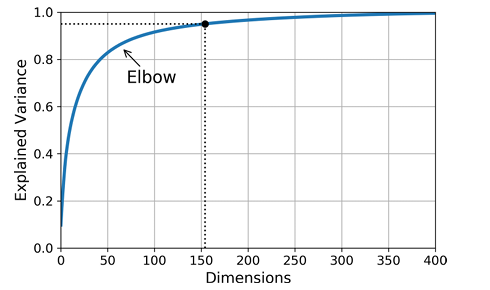

Gambar 8-8. Varians yang dijelaskan sebagai fungsi dari jumlah dimensi

**PCA for Compression**

In [ ]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

Gambar 8-9 menunjukkan beberapa digit dari set pelatihan asli (di sebelah kiri), dan digit terkait setelah kompresi dan dekompresi. Anda dapat melihat bahwa ada sedikit penurunan kualitas gambar, tetapi sebagian besar digit masih utuh.

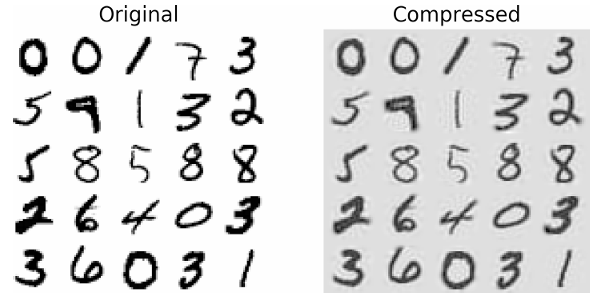

Gambar 8-9. Kompresi MNIST yang mempertahankan 95% varians

**Randomized PCA**

 If you set the svd_solver hyperparameter to "randomized", Scikit-Learn uses a sto
chastic algorithm called Randomized PCA that quickly finds an approximation of the
 first d principal components. Its computational complexity is O(m × d2) + O(d3),
 instead of O(m × n2) + O(n3) for the full SVD approach, so it is dramatically faster
 than full SVD when d is much smaller than n:

In [ ]:
rnd_pca = PCA(n_components=154, svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)

**Incremental PCA**

Satu masalah dengan implementasi PCA sebelumnya adalah bahwa implementasi tersebut mengharuskan seluruh set pelatihan masuk ke dalam memori agar algoritma dapat berjalan. Untungnya, algoritma Incremental PCA (IPCA) telah dikembangkan. Algoritma tersebut memungkinkan Anda untuk membagi set pelatihan menjadi beberapa kelompok kecil dan memasukkan algoritma IPCA satu kelompok kecil pada satu waktu.

In [ ]:
import numpy as np
import gc
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, IncrementalPCA
from sklearn.linear_model import Ridge

In [ ]:
print("Memuat dataset MNIST...")
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='liac-arff')
X, y = mnist["data"], mnist["target"]

Memuat dataset MNIST...


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Data siap digunakan. Bentuk X_train:", X_train.shape)

Data siap digunakan. Bentuk X_train: (56000, 784)


**Kernel PCA**

Dalam Bab 5, kami membahas trik kernel, sebuah teknik matematika yang secara implisit memetakan instans ke dalam ruang berdimensi sangat tinggi (disebut ruang fitur), yang memungkinkan klasifikasi dan regresi nonlinier dengan Support Vector Machines. Ingatlah bahwa batas keputusan linier dalam ruang fitur berdimensi tinggi sesuai dengan batas keputusan nonlinier kompleks dalam ruang asli. Ternyata trik yang sama dapat diterapkan pada PCA, yang memungkinkan untuk melakukan proyeksi nonlinier kompleks untuk pengurangan dimensionalitas. Ini disebut Kernel PCA (kPCA). Sering kali bagus dalam mempertahankan kluster instans setelah proyeksi, atau terkadang bahkan membuka gulungan kumpulan data yang terletak dekat dengan manifold yang terpilin. Kode berikut menggunakan kelas KernelPCA Scikit-Learn untuk melakukan kPCA dengan kernel RBF.

In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
print("Menjalankan KernelPCA dengan metode aproksimasi...")

Menjalankan KernelPCA dengan metode aproksimasi...


In [ ]:
n_subset = 5000 # Kita bisa gunakan subset yang lebih besar sekarang
X_subset = X_train[:n_subset]

In [ ]:
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_kpca_subset = kpca.fit_transform(X_subset)

In [ ]:
regressor = Ridge(alpha=0.1)
regressor.fit(X_subset, X_kpca_subset)

Ridge(alpha=0.1)

In [ ]:
X_reduced_efficient = regressor.predict(X_train)

In [ ]:
print("Reduksi dimensi dengan aproksimasi KernelPCA selesai.")
print("Bentuk data asli (X_train):", X_train.shape)
print("Bentuk data setelah reduksi:", X_reduced_efficient.shape)

Reduksi dimensi dengan aproksimasi KernelPCA selesai.
Bentuk data asli (X_train): (56000, 784)
Bentuk data setelah reduksi: (56000, 2)


In [ ]:
print("Menjalankan IncrementalPCA dengan metode memory-map...")

Menjalankan IncrementalPCA dengan metode memory-map...


In [ ]:
filename = "my_mnist_train.mmap"
m, n = X_train.shape
n_batches = 200 # Jumlah batch
batch_size = m // n_batches
n_components = 154

In [ ]:
print(f"  - Membuat file '{filename}' di disk...")
X_mm = np.memmap(filename, dtype='float32', mode='w+', shape=(m, n))
X_mm[:] = X_train
X_mm.flush()

  - Membuat file 'my_mnist_train.mmap' di disk...


In [ ]:
del X_mm
gc.collect()

0

In [ ]:
X_mm_readonly = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))
inc_pca = IncrementalPCA(n_components=n_components, batch_size=batch_size)
inc_pca.fit(X_mm_readonly)

print("Pelatihan IncrementalPCA selesai.")

Pelatihan IncrementalPCA selesai.


Gambar 8-10 menunjukkan Swiss roll, disederhanakan menjadi dua dimensi menggunakan kernel linear (setara dengan hanya menggunakan kelas PCA), kernel RBF, dan kernel sigmoid.

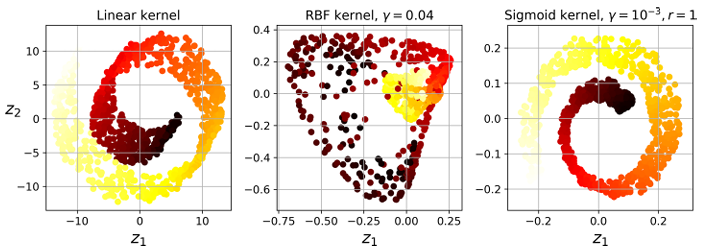

**Selecting a Kernel and Tuning Hyperparameters**

Karena kPCA adalah algoritma pembelajaran tanpa pengawasan, tidak ada ukuran kinerja yang jelas untuk membantu Anda memilih nilai kernel dan hiperparameter terbaik. Meskipun demikian, pengurangan dimensionalitas sering kali merupakan langkah persiapan untuk tugas pembelajaran terbimbing (misalnya, klasifikasi), sehingga Anda dapat menggunakan pencarian grid untuk memilih kernel dan hiperparameter yang menghasilkan kinerja terbaik pada tugas tersebut. Kode berikut membuat alur kerja dua langkah, pertama-tama mengurangi dimensionalitas menjadi dua dimensi menggunakan kPCA, kemudian menerapkan Regresi Logistik untuk klasifikasi. Kemudian menggunakan GridSearchCV untuk menemukan nilai kernel dan gamma terbaik untuk kPCA guna mendapatkan akurasi klasifikasi terbaik di akhir alur kerja:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
n_search_samples = 2000
indices = np.random.permutation(len(X))[:n_search_samples]
X_search = X[indices]
y_search = y[indices]

In [ ]:
print(f"Menjalankan GridSearchCV pada subset data berukuran {X_search.shape}")

Menjalankan GridSearchCV pada subset data berukuran (2000, 784)


In [ ]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression(max_iter=200)) # Tambahkan max_iter agar konvergen
])

In [ ]:
param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

In [ ]:
grid_search = GridSearchCV(clf, param_grid, cv=3, verbose=2)
grid_search.fit(X_search, y_search)
print("\nPencarian selesai.")
print("Parameter terbaik:", grid_search.best_params_)
print("Skor validasi terbaik:", grid_search.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .................kpca__gamma=0.03, kpca__kernel=rbf; total time=   0.2s
[CV] END .................kpca__gamma=0.03, kpca__kernel=rbf; total time=   0.2s
[CV] END .................kpca__gamma=0.03, kpca__kernel=rbf; total time=   0.3s
[CV] END .............kpca__gamma=0.03, kpca__kernel=sigmoid; total time=   0.1s
[CV] END .............kpca__gamma=0.03, kpca__kernel=sigmoid; total time=   0.1s
[CV] END .............kpca__gamma=0.03, kpca__kernel=sigmoid; total time=   0.1s
[CV] END ..kpca__gamma=0.03222222222222222, kpca__kernel=rbf; total time=   0.2s
[CV] END ..kpca__gamma=0.03222222222222222, kpca__kernel=rbf; total time=   0.4s
[CV] END ..kpca__gamma=0.03222222222222222, kpca__kernel=rbf; total time=   0.3s
[CV] END kpca__gamma=0.03222222222222222, kpca__kernel=sigmoid; total time=   0.2s
[CV] END kpca__gamma=0.03222222222222222, kpca__kernel=sigmoid; total time=   0.1s
[CV] END kpca__gamma=0.03222222222222222, kp

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/pipeline.py", line 654, in fit
    Xt = self._fit(X, y, routed_params, r


Pencarian selesai.
Parameter terbaik: {'kpca__gamma': np.float64(0.03), 'kpca__kernel': 'rbf'}
Skor validasi terbaik: 0.1240003121562342


Perhatikan bahwa jika kita dapat membalikkan langkah PCA linear untuk contoh tertentu dalam ruang tereduksi, titik yang direkonstruksi akan berada dalam ruang fitur, bukan dalam ruang asli (misalnya, seperti yang direpresentasikan oleh X dalam diagram). Karena ruang fitur berdimensi tak terbatas, kita tidak dapat menghitung titik yang direkonstruksi, dan oleh karena itu kita tidak dapat menghitung kesalahan rekonstruksi yang sebenarnya. Untungnya, adalah mungkin untuk menemukan titik dalam ruang asli yang akan memetakan dekat dengan titik yang direkonstruksi. Titik ini disebut pra-citra rekonstruksi. Setelah Anda memiliki pra-citra ini, Anda dapat mengukur jarak kuadratnya ke contoh asli. Anda kemudian dapat memilih kernel dan hiperparameter yang meminimalkan kesalahan pra-citra rekonstruksi ini


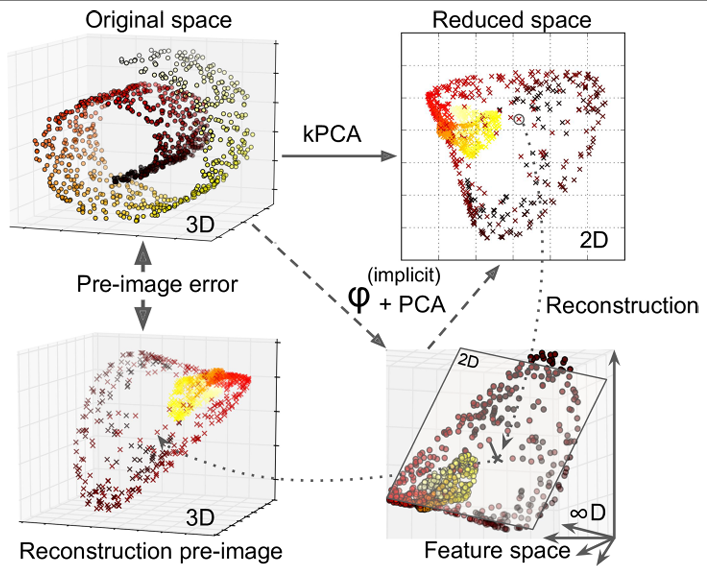


Gambar 8-11. Kernel PCA dan kesalahan pra-gambar rekonstruksi

Anda mungkin bertanya-tanya bagaimana cara melakukan rekonstruksi ini. Salah satu solusinya adalah melatih model regresi terbimbing, dengan contoh yang diproyeksikan sebagai set pelatihan dan contoh asli sebagai target. Scikit-Learn akan melakukan ini secara otomatis jika Anda menetapkan fit_inverse_transform=True, seperti yang ditunjukkan dalam kode berikut:

In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X_subset)
X_preimage = rbf_pca.inverse_transform(X_reduced)

Anda kemudian dapat menghitung kesalahan pra-gambar rekonstruksi:

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
reconstruction_error = mean_squared_error(X_subset, X_preimage)

In [ ]:
print(f"Reconstruction Error (MSE): {reconstruction_error}")

Reconstruction Error (MSE): 0.9378379692167506


**LLE**

Penanaman Linear Lokal (LLE) adalah teknik reduksi dimensionalitas nonlinier (NLDR) yang ampuh. Ini adalah teknik Pembelajaran Manifold yang tidak bergantung pada proyeksi, seperti yang dilakukan algoritma sebelumnya. Singkatnya, LLE bekerja dengan terlebih dahulu mengukur bagaimana setiap contoh pelatihan berhubungan secara linear dengan tetangga terdekatnya (c.n.), dan kemudian mencari representasi berdimensi rendah dari set pelatihan tempat hubungan lokal ini paling baik dipertahankan (detail lebih lanjut akan segera diberikan). Pendekatan ini membuatnya sangat baik dalam membuka gulungan manifold yang terpilin, terutama saat tidak ada terlalu banyak noise.

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

Kode berikut menggunakan kelas LocallyLinearEmbedding dari Scikit-Learn untuk membuka gulungan Swiss:

In [ ]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X_reduced = lle.fit_transform(X)

Kumpulan data 2D yang dihasilkan ditunjukkan pada Gambar 8-12. Seperti yang dapat Anda lihat, gulungan Swiss tidak tergulung sama sekali, dan jarak antar contoh terpelihara dengan baik secara lokal. Namun, jarak tidak terpelihara dalam skala yang lebih besar: bagian kiri gulungan Swiss yang tidak tergulung diregangkan, sedangkan bagian kanan terjepit. Meskipun demikian, LLE melakukan pekerjaan yang cukup baik dalam memodelkan manifold.

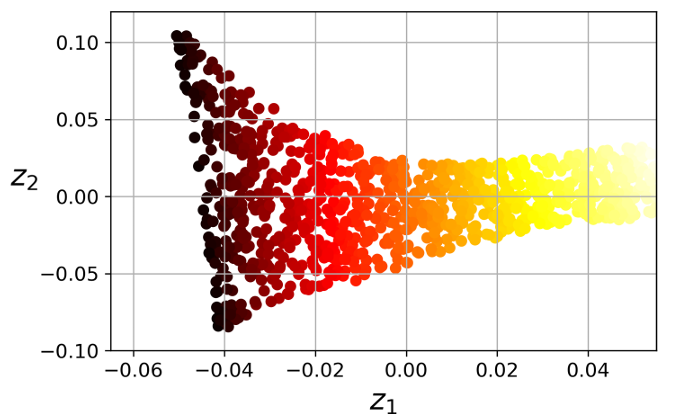

Gambar 8-12. Gulungan Swiss yang tidak digulung menggunakan LLE